In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np

## Чтение файла и преобразование его в numpy матрице

In [100]:
def exel_to_array(filename):
    ''''''
    points = list(range(1,15))
    names = list(map(lambda x: 'point_{}'.format(x), points))
    data = pd.read_excel(filename, header=None, names = names)
    return data.to_numpy()

In [101]:
a = exel_to_array('Mn_sw-15_ampl-210.xlsx')

## Обработка матрицы синусом, возвращает матрицу

In [102]:
def sinus_proc(matrix, phase):
    '''proccesing  matrix it with sinus'''
    full = list()
    rad = phase/360
    
    for i in range(matrix.shape[0]):
        str_sin = 0
        for j in range(matrix.shape[1]):
            str_sin += matrix[i][j] * (np.sin((2* np.pi) * ((j / 14) + rad)))
        full.append(str_sin)   
    return full

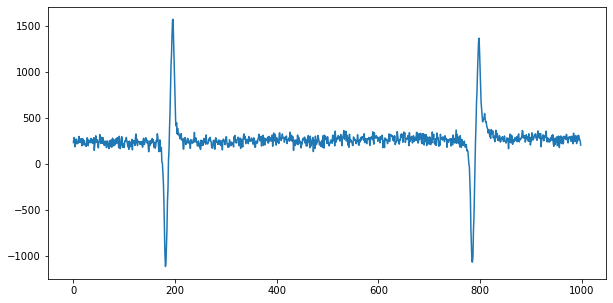

In [103]:
plt.figure(figsize=(10,5))
plt.plot(range(999), sinus_proc(a, 0))

## Добавление виртуальных точек между строками, возвращает матрицу

In [15]:
def add_virtual_points(matrix):
    
    data_sub = np.empty((matrix.shape[0],matrix.shape[1]))
    for i in range(matrix.shape[0] - 1):
        data_sub[i] = (matrix[i+1] + matrix[i]) / 2 
    
    full_data = np.empty((matrix.shape[0] * 2,14))
    
    full_data = []
    for i in range(matrix.shape[0] - 1):
        full_data.append(matrix[i])
        full_data.append(data_sub[i])
    #full_arr = np.array(full_data)
    return np.array(full_data)
    

In [48]:
b = add_virtual_points(a)

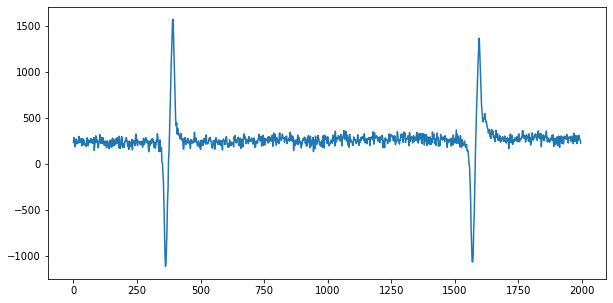

In [64]:
plt.figure(figsize=(10,5))

plt.plot(range(b.shape[0]), sinus_proc(b, 0))

In [59]:
b2 = add_virtual_points(b)

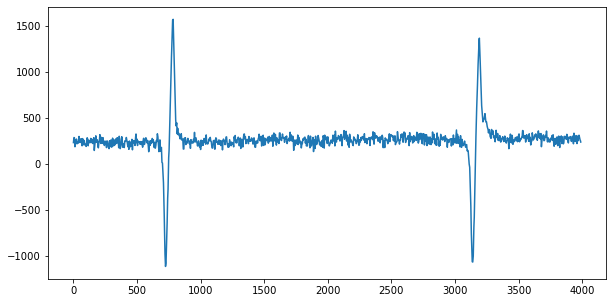

In [65]:
plt.figure(figsize=(10,5))

plt.plot(range(b2.shape[0]), sinus_proc(b2, 0))

## Использование функция свертки

In [46]:
k = np.array([[0,0,0,0,0,1,1,1,0,0,0,0,0,0],
              [0,0,0,0,0,1,-1,1,0,0,0,0,0,0],])
from scipy import ndimage
res = ndimage.convolve(a, k, mode='constant', cval=1.0)

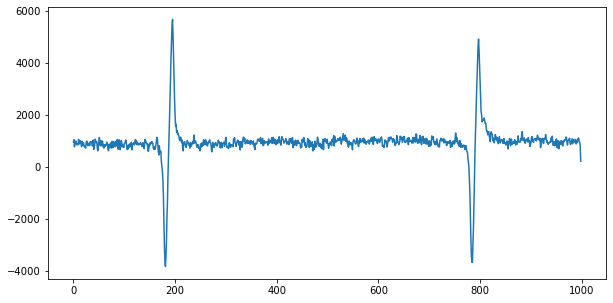

In [48]:
plt.figure(figsize=(10,5))
plt.plot(range(res.shape[0]), sinus_proc(res, 0))

## Добавление виртуальных точек между каждым элементом, возвращает матрицу

In [104]:
def add_virtual_points_width(matrix):
    matrix_to_add = np.empty((a.shape[0],a.shape[1]-1))
    for i in range(matrix.shape[0]):
        matrix_to_add[i] = [(matrix[i][j-1] + matrix[i][j]) / 2 for j in range(1,matrix.shape[1])]
    
    #matrix_to_add = [(matrix[0][i-1] + matrix[0][i]) / 2 for i in range(1,len(matrix[0]))]
    full_data=[]
    for j in range(matrix.shape[0]):
        for i in range(0,matrix_to_add.shape[1]):
            full_data.append(matrix[j][i])
            full_data.append(matrix_to_add[j][i])
    full_data = np.asarray(full_data)
    full_data = full_data.reshape(999,26)
    return full_data

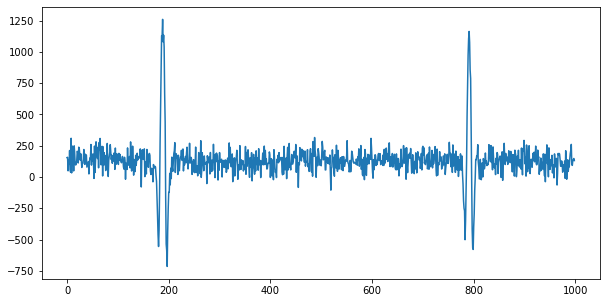

In [105]:
b = add_virtual_points_width(a)

plt.figure(figsize=(10,5))
plt.plot(range(b.shape[0]), sinus_proc(b, 0))